# 1) Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import calendar as cal

# 2) Importing files

In [2]:
# Path
path = r'C:\Users\GTSA - Infinity\Documents\Analytika career foundry\Task 4 PYTHON\Instacart Basket Analysis'

In [3]:
# Importing pkl 
new_customer_data = pd.read_pickle(os.path.join(path, '02 Original data','Prepared Data', 'orders_products_customers_merged_4_9_1.pkl'))

In [4]:
new_customer_data.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_type,median_days_since_prior_order,Customer_frequency
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Slowest days,Most orers,8,New customer,7.988889,Low_spender,19.0,Regular_customer


# 3) Creating Bar Chart - orders day of week

In [5]:
# Creating a dictionary to map day numbers to day names
# Note: The first weekday is an integer specifying the first day of the week. MONDAY is 0 (the default), and SUNDAY is 6
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [6]:
# Replacing day numbers in the "order_dow" column with day names
new_customer_data['order_dow'] = new_customer_data['order_dow'].replace(day_names)

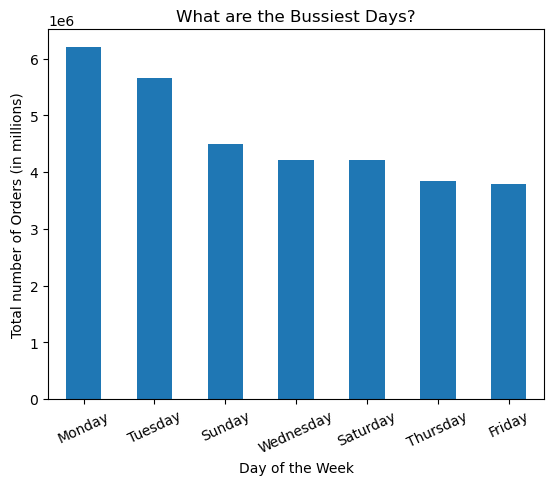

In [7]:
# Adding colours to the bar chart
bar_orders_day_week_0 = new_customer_data['order_dow'].value_counts().plot.bar(title = "What are the Bussiest Days?", xlabel = "Day of the Week",rot= 25, ylabel = "Total number of Orders (in millions)")

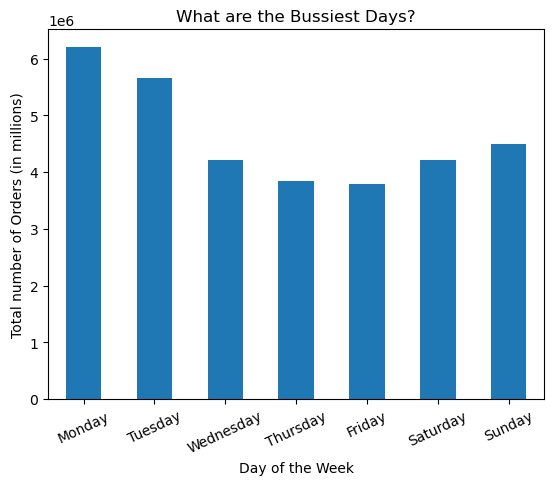

In [8]:
# Creating bar chart with names of the week in logical order
new_index_order_dow = ['Monday', 'Tuesday',  'Wednesday', 'Thursday',  'Friday','Saturday','Sunday']  
bar_orders_day_week_2 = new_customer_data['order_dow'].value_counts().reindex(new_index_order_dow).plot.bar(title = "What are the Bussiest Days?", xlabel = "Day of the Week",rot= 25, ylabel = "Total number of Orders (in millions)")

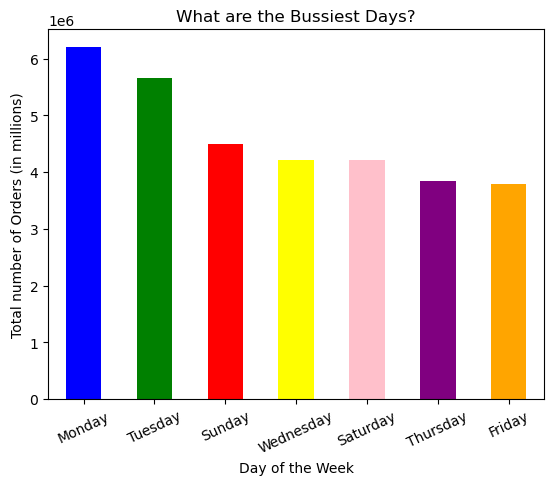

In [9]:
# Adding colours to the bar chart
bar_orders_day_week_1 = new_customer_data['order_dow'].value_counts().plot.bar(title = "What are the Bussiest Days?", xlabel = "Day of the Week",rot= 25, ylabel = "Total number of Orders (in millions)", color =['blue', 'green', 'red', 'yellow', 'pink', 'purple', 'orange'])

In [10]:
# Numer of orders total per day
new_index_order_dow = ['Monday', 'Tuesday',  'Wednesday', 'Thursday',  'Friday','Saturday','Sunday']  
new_customer_data['order_dow'].value_counts().reindex(new_index_order_dow)

Monday       6204404
Tuesday      5660456
Wednesday    4213986
Thursday     3840701
Friday       3783953
Saturday     4205906
Sunday       4496635
Name: order_dow, dtype: int64

In [11]:
# Exporting visualizations as “.png”
bar_orders_day_week_0.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Which_day_people_order_most.png'))

In [12]:
# Exporting visualizations as “.png”
bar_orders_day_week_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Which_day_people_order_most_days.png'))

# 4) Creating Histogram

<AxesSubplot:ylabel='Frequency'>

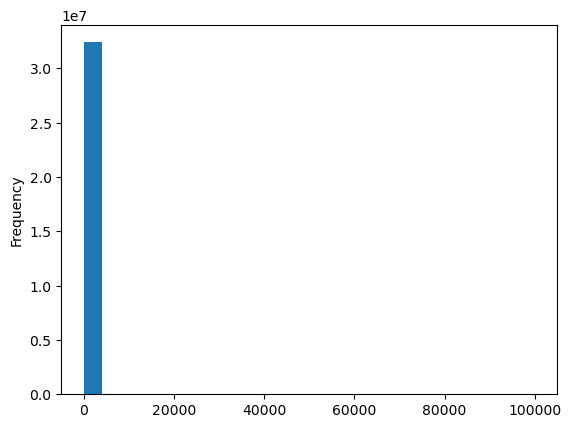

In [13]:
# Creating a histogram of the prices column
new_customer_data['prices'].plot.hist(bins = 25)

In [14]:
new_customer_data['prices'].describe()

count    3.240604e+07
mean     1.198004e+01
std      4.956464e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [15]:
# Then he maximum price anyone would pay in a supermarket were around $100. Checking the following code
new_customer_data.loc[new_customer_data['prices'] > 100]

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_type,median_days_since_prior_order,Customer_frequency
5547,117740,Lisa,Sparks,Female,Oregon,55,1/1/2017,1,married,292759,...,High-range product,Regularly busy,Regularly busy,Most orers,84,Loyal customer,36.928431,High_spender,4.0,Frequent_customer
10303,31590,Beverly,Sanford,Female,Montana,46,1/1/2017,0,single,154076,...,High-range product,Regularly busy,Regularly busy,Average orders,38,Regular customer,58.139865,High_spender,8.0,Frequent_customer
27945,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,High-range product,Regularly busy,Regularly busy,Average orders,5,New customer,627.991667,High_spender,11.0,Regular_customer
27946,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,High-range product,Busiest day,Busiest days,Most orers,5,New customer,627.991667,High_spender,11.0,Regular_customer
27947,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,High-range product,Busiest day,Busiest days,Most orers,5,New customer,627.991667,High_spender,11.0,Regular_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32392104,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,High-range product,Regularly busy,Slowest days,Most orers,53,Loyal customer,69.638604,High_spender,7.0,Frequent_customer
32392105,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,High-range product,Regularly busy,Regularly busy,Average orders,53,Loyal customer,69.638604,High_spender,7.0,Frequent_customer
32392106,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,High-range product,Regularly busy,Regularly busy,Most orers,53,Loyal customer,69.638604,High_spender,7.0,Frequent_customer
32398172,140589,Clarence,Harper,Male,Maryland,26,4/1/2020,0,single,154845,...,High-range product,Regularly busy,Regularly busy,Average orders,9,New customer,876.974783,High_spender,20.0,Regular_customer


In [16]:
# Replacing 5127 prices as missing with NaN
new_customer_data.loc[new_customer_data['prices'] >100, 'prices'] = np.nan

In [17]:
#Checking the new max value of prices
new_customer_data['prices'].max()

25.0

Text(0, 0.5, 'Number of Orders (in millions)')

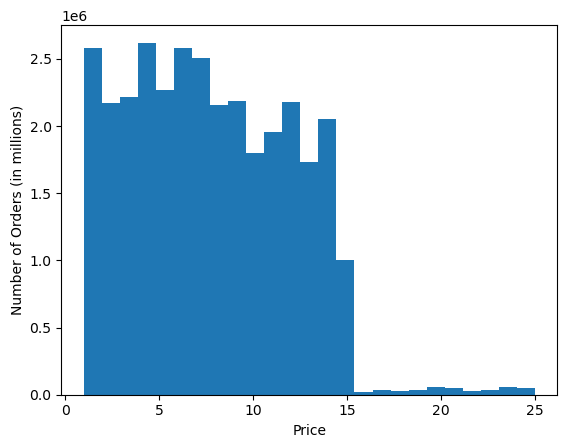

In [18]:
# Retrying that histogram 
hist = new_customer_data['prices'].plot.hist(bins = 25)
plt.xlabel('Price')
plt.ylabel('Number of Orders (in millions)') 

Text(0, 0.5, 'Number of Orders (in millions)')

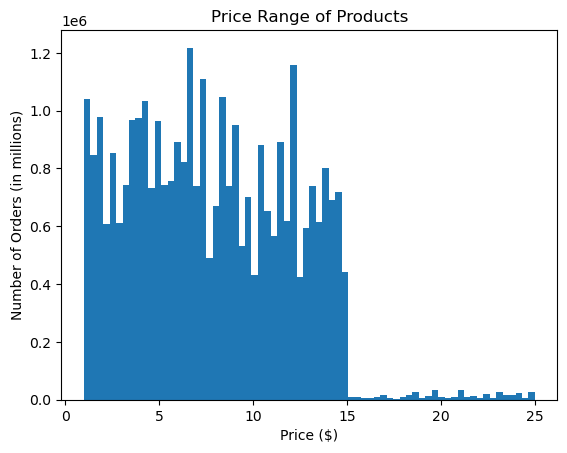

In [19]:
# To increase the level of granularity in the histogram, increasing the number of bins to 70. 
# This will result in a histogram with more, thinner columns.
hist_0 = new_customer_data['prices'].plot.hist(bins = 70)
plt.title('Price Range of Products')
plt.xlabel('Price ($)')
plt.ylabel('Number of Orders (in millions)') 

In [20]:
new_customer_data['prices'].describe()

count    3.240091e+07
mean     7.790962e+00
std      4.241739e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [21]:
# Exporting visualizations as “.png”
hist_0.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range__products.png'))

# 5) Creating Line Chart

In [22]:
# Splitting df into two samples 70/30, aa list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(new_customer_data)) <= 0.7

In [23]:
# Store 70% of the sample in the datafram big
big = new_customer_data[dev]

In [24]:
#store 30% of the sample in the dataframe small
small = new_customer_data[~dev]

In [25]:
# Checking lenght of the entire df
len(new_customer_data)

32406041

In [26]:
# Checking lenght of sample subset and adding them together = lenght of entire df
len(big) + len(small)

32406041

In [27]:
# Getting only the necessary information for the chart
df_2 = small[['order_dow','prices']]

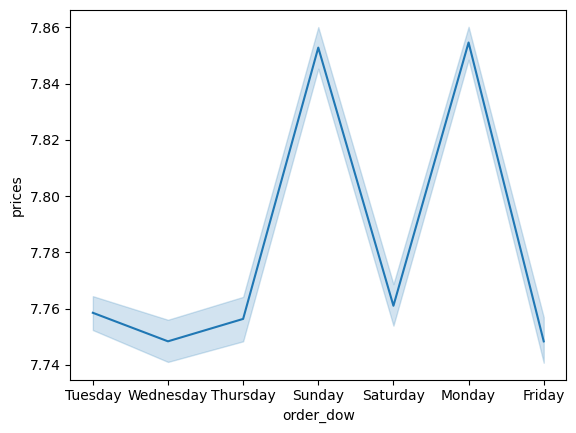

In [28]:
# Creating line chart 
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices',sort=True)

# 6) You need to provide the Instacart senior stakeholders with descriptive findings about sales. 

Text(0, 0.5, 'Number of Orders (in millions)')

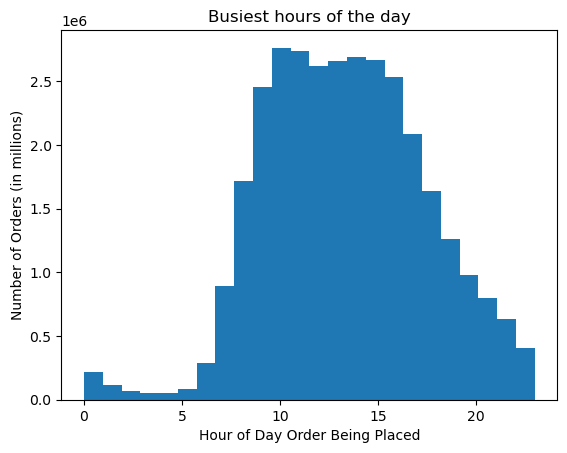

In [29]:
# Creating a histogram of the prices column with 24 bins, since there are 24 hours in a day
hist_1 = new_customer_data['order_hour_of_day'].plot.hist(bins = 24,title ='Busiest hours of the day', )
plt.xlabel('Hour of Day Order Being Placed')
plt.ylabel('Number of Orders (in millions)')

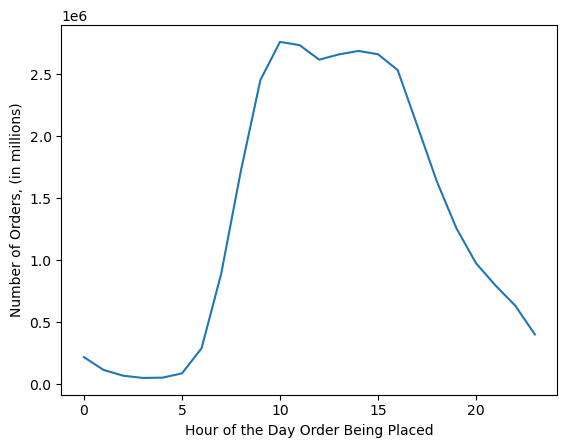

In [30]:
# Creating a line chart visualization of hour when order is placed and number of orders
line_orders = new_customer_data.groupby(['order_hour_of_day'])['order_number'].count()
hours = [hour for hour, df in new_customer_data.groupby('order_hour_of_day')]
plt.plot(hours, line_orders)
plt.xlabel('Hour of the Day Order Being Placed')
plt.ylabel('Number of Orders, (in millions)')
plt.show()

In [31]:
# Exporting visualizations as “.png”
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_histogram.png'))

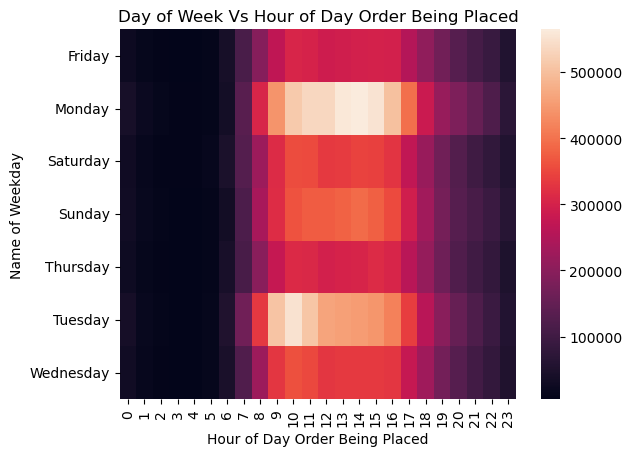

In [32]:
# Creating heat-map for the intersection hour of day order being placed and name of the week days
heat_map_df = new_customer_data.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
heat_map_df = heat_map_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
fig = plt.figure()
sns.heatmap(heat_map_df)
plt.title('Day of Week Vs Hour of Day Order Being Placed')
plt.xlabel('Hour of Day Order Being Placed')
plt.ylabel('Name of Weekday')
plt.show()

In [33]:
# Exporting visualizations as “.png”
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Heat Map order_hour_of_day_vs_prices.png'))

# 7) The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

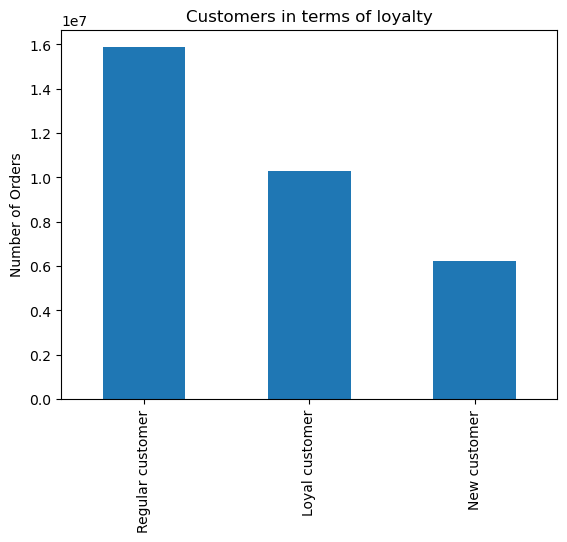

In [34]:
#Creating a bar chart of loyalty_flag
loyalty = new_customer_data['loyalty_flag'].value_counts().plot.bar(title = 'Customers in terms of loyalty', ylabel = 'Number of Orders')

In [35]:
# Exporting visualizations as “.png”
loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar_chart.png'))

# 8) Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)


In [36]:
# Getting only the necessary information for the chart
df_3 = small[['order_hour_of_day','prices']]

Text(0, 0.5, 'Prices Across the Days of Week')

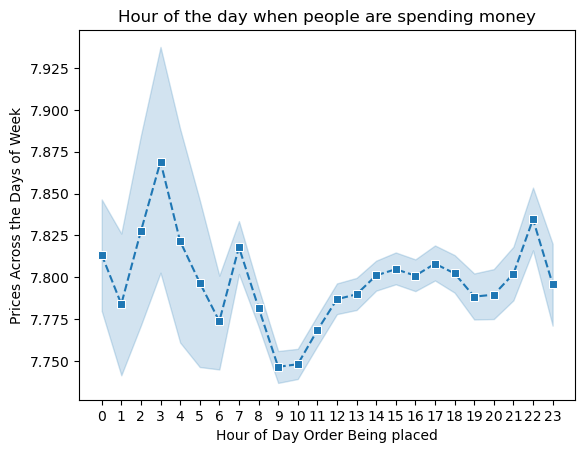

In [37]:
# Creating a line chart
line_new = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices', linestyle = '--', marker = 's')
line_new.set_title('Hour of the day when people are spending money')
line_new.set(xticks=np.arange(0,24,1))
line_new.set_xlabel('Hour of Day Order Being placed')
line_new.set_ylabel('Prices Across the Days of Week')

In [38]:
# Exploring column prices with describe
new_customer_data['prices'].describe()

count    3.240091e+07
mean     7.790962e+00
std      4.241739e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [39]:
# People are spending the most money at 3 a.m., 7 a.m. and 10 p.m. Mean of the prices is $7,79.

In [40]:
# Exporting visualizations as “.png”
line_new.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_vs_prices.png'))

# 9) Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [41]:
# Getting only the necessary information for the chart
df_4 = small[['age','number_of_dependants']]

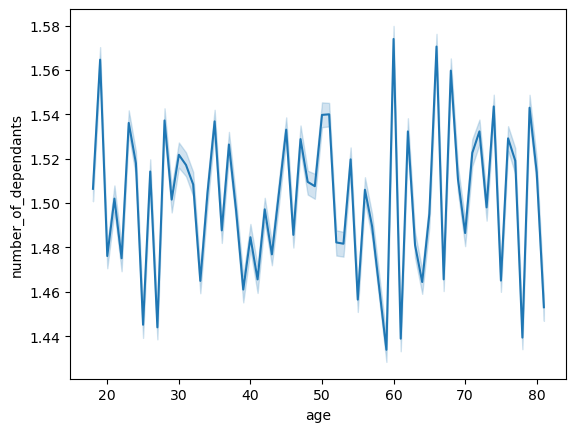

In [42]:
# Creating a line chart
line3 = sns.lineplot(data = df_4, x = 'age', y = 'number_of_dependants')

In [43]:
# Exporting visualizations as “.png”
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_num_of_dep.png'))

# 10) You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [44]:
# Getting only the necessary information for the chart
df_5 = small[['age','income']]

Text(20, 500000, 'r = 0.417')

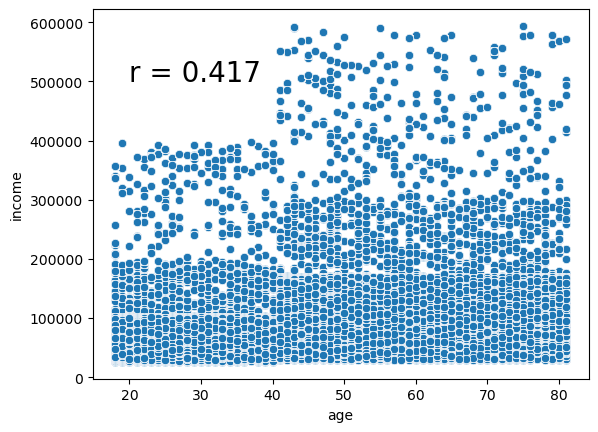

In [45]:
# Creating scatterplot
scatter = sns.scatterplot(x = 'age', y = 'income',data = df_5)
r = scipy.stats.pearsonr(x=df_5.age, y=df_5 .income)[0]
plt.text(20, 500000, 'r = ' + str(round(r, 4)), fontsize=20)